# MOBILE PRICE CLASSIFICATION

I have analyzed mobile price features with respect to price range.

### Features:-

In [ ]:
NAME: Name of the mobile phones.

RATINGS: Ratings for a mobile phone ,A rating is an evaluation or assessment of something, in terms of quality, quantity, or some combination of both.

DISCOUNT(%): It refers to an amount or percentage deducted from the normal selling price of something.
PRICE: Different price for mobile phones.
    
PRICE_RANGE: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
    
DISPLAY(cms): The display of mobile phones in cms.
    
BATTERY(mAh): Total energy a battery can store in one time measured in mAh.

SIMTYPE: Has single,dual,triple sim support or not.

THREE_G: Has 3G or not.

INTERNALSTORAGE(GB): Internal Memory in Gigabytes.
    
RAM(GB): Random Access Memory in GigaBytes.
    
BLUETOOTH: Has bluetooth or not.

WIFI: Has wifi or not.


### IMPORTING LIBRARIES

In [92]:
import pandas as pd
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC


### READING THE DATA

In [2]:
df=pd.read_excel('finalee1.xlsx')

In [3]:
df.head()

,NAME,RATINGS,DISCOUNT(%),PRICE,PRICE_RANGE,DISPLAY(cms),BATTERY(mAh),SIMTYPE,THREE_G,INTERNALSTORAGE(GB),RAM(GB),BLUETOOTH,WIFI
0,I Kall K 48 (Green),3.8,15.0,549,low,4.57,1500,Dual Sim,No,0.064,0.032,Yes,Yes
1,I Kall K26 New (Blue),3.5,15.0,549,low,4.57,800,Dual Sim,No,0.032,0.032,Yes,No
2,Peace FM1 (Black & Red),3.6,NaN,574,low,4.57,850,Dual Sim,No,0.032,0.032,Yes,No
3,Hicell C9 Metro (Black & Green),3.6,NaN,599,low,4.57,1050,Dual Sim,No,0.064,0.032,Yes,Yes
4,GreenBerry Champ (White),3.4,NaN,599,low,4.57,1000,Dual Sim,No,0.064,0.032,Yes,Yes


#PRICE RANGE:-
#LOW=500-4000
#MEDIUM=4000-30000
#HIGH=30000-90000
#VERY HIGH=100000-125000

### DESCRIBING THE DATA

In [4]:
df.shape

(382, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 382 non-null    object 
 1   RATINGS              379 non-null    float64
 2   DISCOUNT(%)          174 non-null    float64
 3   PRICE                382 non-null    int64  
 4   PRICE_RANGE          382 non-null    object 
 5   DISPLAY(cms)         382 non-null    float64
 6   BATTERY(mAh)         382 non-null    int64  
 7   SIMTYPE              382 non-null    object 
 8   THREE_G              382 non-null    object 
 9   INTERNALSTORAGE(GB)  382 non-null    float64
 10  RAM(GB)              382 non-null    float64
 11  BLUETOOTH            382 non-null    object 
 12  WIFI                 382 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 38.9+ KB


In [6]:
df.isnull().sum()

NAME                     0
RATINGS                  3
DISCOUNT(%)            208
PRICE                    0
PRICE_RANGE              0
DISPLAY(cms)             0
BATTERY(mAh)             0
SIMTYPE                  0
THREE_G                  0
INTERNALSTORAGE(GB)      0
RAM(GB)                  0
BLUETOOTH                0
WIFI                     0
dtype: int64

### DATA ANALYSIS

IMPUTING NULL VALUES(As all the null values are from discount column we assign them as 0)

In [7]:
df["RATINGS"].fillna(0, inplace = True)  
df['DISCOUNT(%)'].fillna(0,inplace=True)

In [8]:
df.isnull().sum()

NAME                   0
RATINGS                0
DISCOUNT(%)            0
PRICE                  0
PRICE_RANGE            0
DISPLAY(cms)           0
BATTERY(mAh)           0
SIMTYPE                0
THREE_G                0
INTERNALSTORAGE(GB)    0
RAM(GB)                0
BLUETOOTH              0
WIFI                   0
dtype: int64

In [9]:
#Dropping the features with high ratio of missing values and full_name(as it is not relevant)
df=df.drop(['NAME'],axis=1)
df.head()

,RATINGS,DISCOUNT(%),PRICE,PRICE_RANGE,DISPLAY(cms),BATTERY(mAh),SIMTYPE,THREE_G,INTERNALSTORAGE(GB),RAM(GB),BLUETOOTH,WIFI
0,3.8,15.0,549,low,4.57,1500,Dual Sim,No,0.064,0.032,Yes,Yes
1,3.5,15.0,549,low,4.57,800,Dual Sim,No,0.032,0.032,Yes,No
2,3.6,0.0,574,low,4.57,850,Dual Sim,No,0.032,0.032,Yes,No
3,3.6,0.0,599,low,4.57,1050,Dual Sim,No,0.064,0.032,Yes,Yes
4,3.4,0.0,599,low,4.57,1000,Dual Sim,No,0.064,0.032,Yes,Yes


In [10]:
df.describe(include='all')

,RATINGS,DISCOUNT(%),PRICE,PRICE_RANGE,DISPLAY(cms),BATTERY(mAh),SIMTYPE,THREE_G,INTERNALSTORAGE(GB),RAM(GB),BLUETOOTH,WIFI
count,382.000000,382.000000,382.000000,382,382.000000,382.000000,382,382,382.000000,382.000000,382,382
unique,NaN,NaN,NaN,4,NaN,NaN,3,2,NaN,NaN,1,2
top,NaN,NaN,NaN,medium,NaN,NaN,Dual Sim,Yes,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,158,NaN,NaN,358,249,NaN,NaN,382,378
mean,4.212304,7.842932,21334.819372,NaN,12.063063,2938.447644,NaN,NaN,73.396154,3.639131,NaN,NaN
std,0.524397,12.595105,24000.980033,NaN,5.398148,1383.912824,NaN,NaN,83.084247,3.632461,NaN,NaN
min,0.000000,0.000000,549.000000,NaN,1.680000,300.000000,NaN,NaN,0.016000,0.000000,NaN,NaN
25%,4.000000,0.000000,1180.000000,NaN,6.100000,1550.000000,NaN,NaN,0.042250,0.032000,NaN,NaN
50%,4.400000,0.000000,16999.000000,NaN,15.490000,3182.000000,NaN,NaN,64.000000,4.000000,NaN,NaN
75%,4.500000,14.000000,29974.250000,NaN,16.230000,4000.000000,NaN,NaN,128.000000,6.000000,NaN,NaN


In [11]:
ds_cat = df.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,PRICE_RANGE,SIMTYPE,THREE_G,BLUETOOTH,WIFI
0,low,Dual Sim,No,Yes,Yes
1,low,Dual Sim,No,Yes,No


In [12]:
df.PRICE_RANGE=df.PRICE_RANGE.astype('category')

### CORRELATION BETWEEN FEATURES

Text(0.5, 1, 'Correlation ')

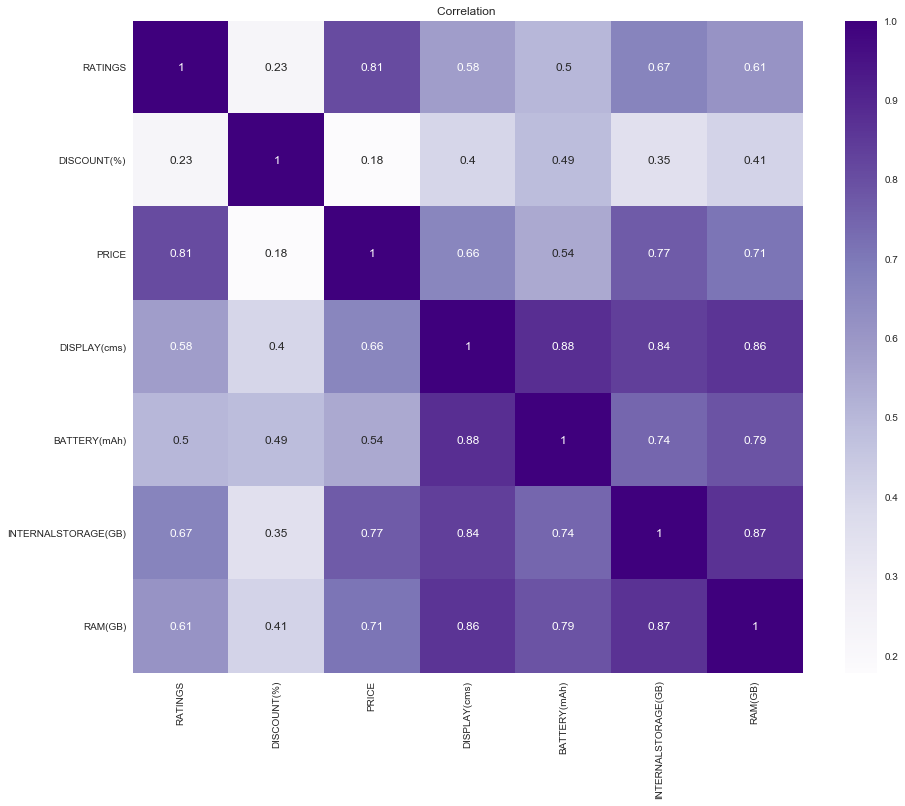

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr(method='spearman')
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples',annot=True)
r.set_title("Correlation ")

As we can see our target price has highly positive correlation between Ratings.

Also;

*Display(cms) and Battery(mAh)

*Internal Storage(GB) and RAM(GB)

features have highly positive correlation.

In [14]:
df.PRICE_RANGE=df.PRICE_RANGE.astype('category')
df.SIMTYPE =df.SIMTYPE.astype('category')
df.THREE_G =df.THREE_G.astype('category')
df.BLUETOOTH =df.BLUETOOTH.astype('category')
df.WIFI =df.WIFI.astype('category')

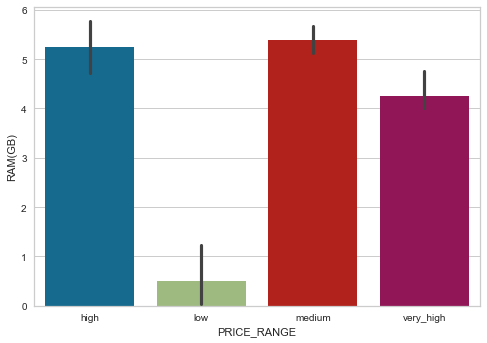

In [15]:
sns.barplot(df['PRICE_RANGE'],df['RAM(GB)'])

There are high number of mobile phones having price range between 4000-30000.

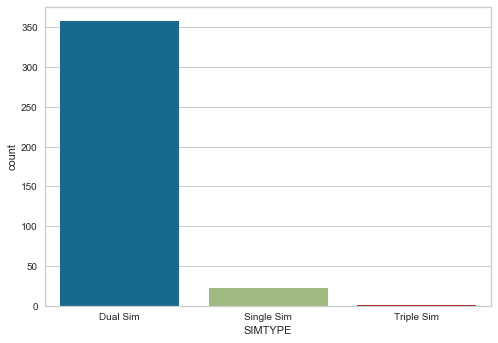

In [16]:
sns.countplot(df['SIMTYPE'])

There are high number of mobile phones having simtype as dual sim.

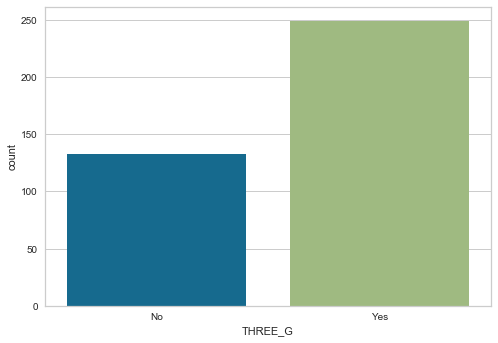

In [17]:
sns.countplot(df['THREE_G'])

There are high number of mobile phones having 3G feature.

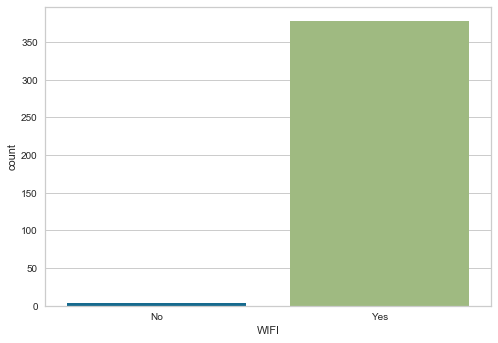

In [18]:
sns.countplot(df['WIFI'])

There are high number of mobile phones having WIFI as a feature.

In [19]:
numerical = ['RATINGS','DISCOUNT(%)','DISPLAY(cms)','BATTERY(mAh)','INTERNALSTORAGE(GB)','RAM(GB)'
  
]
categorical = [
  'PRICE_RANGE','SIMTYPE','THREE_G','BLUETOOTH','WIFI'
]

df = df[numerical + categorical]
df.shape

(382, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014806968308>,
      dtype=object)

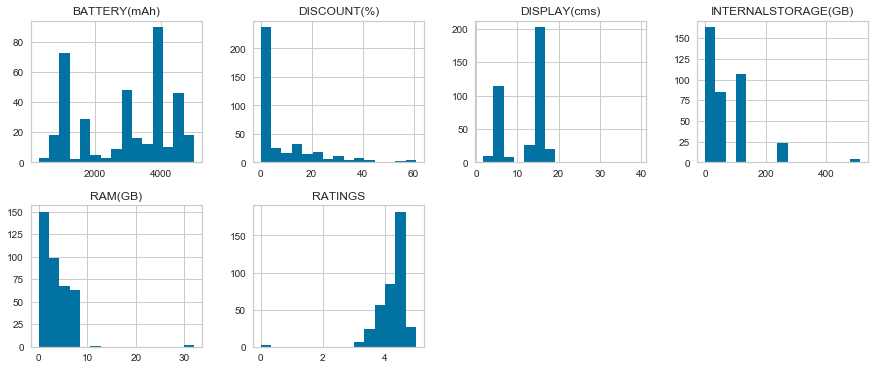

In [20]:
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

These plots shows the distribution of the numerical variables.

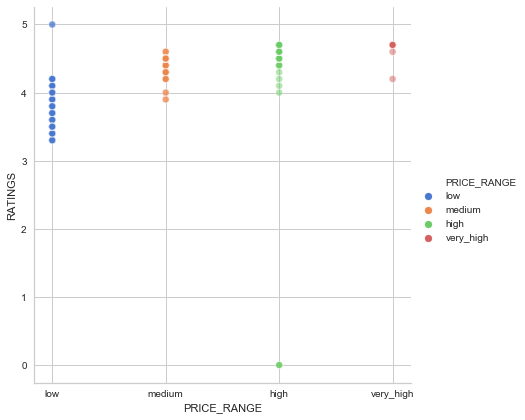

In [21]:
sns.relplot(x="PRICE_RANGE", y="RATINGS", hue="PRICE_RANGE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

This plot shows the ratings of the mobile phones based on their price range.

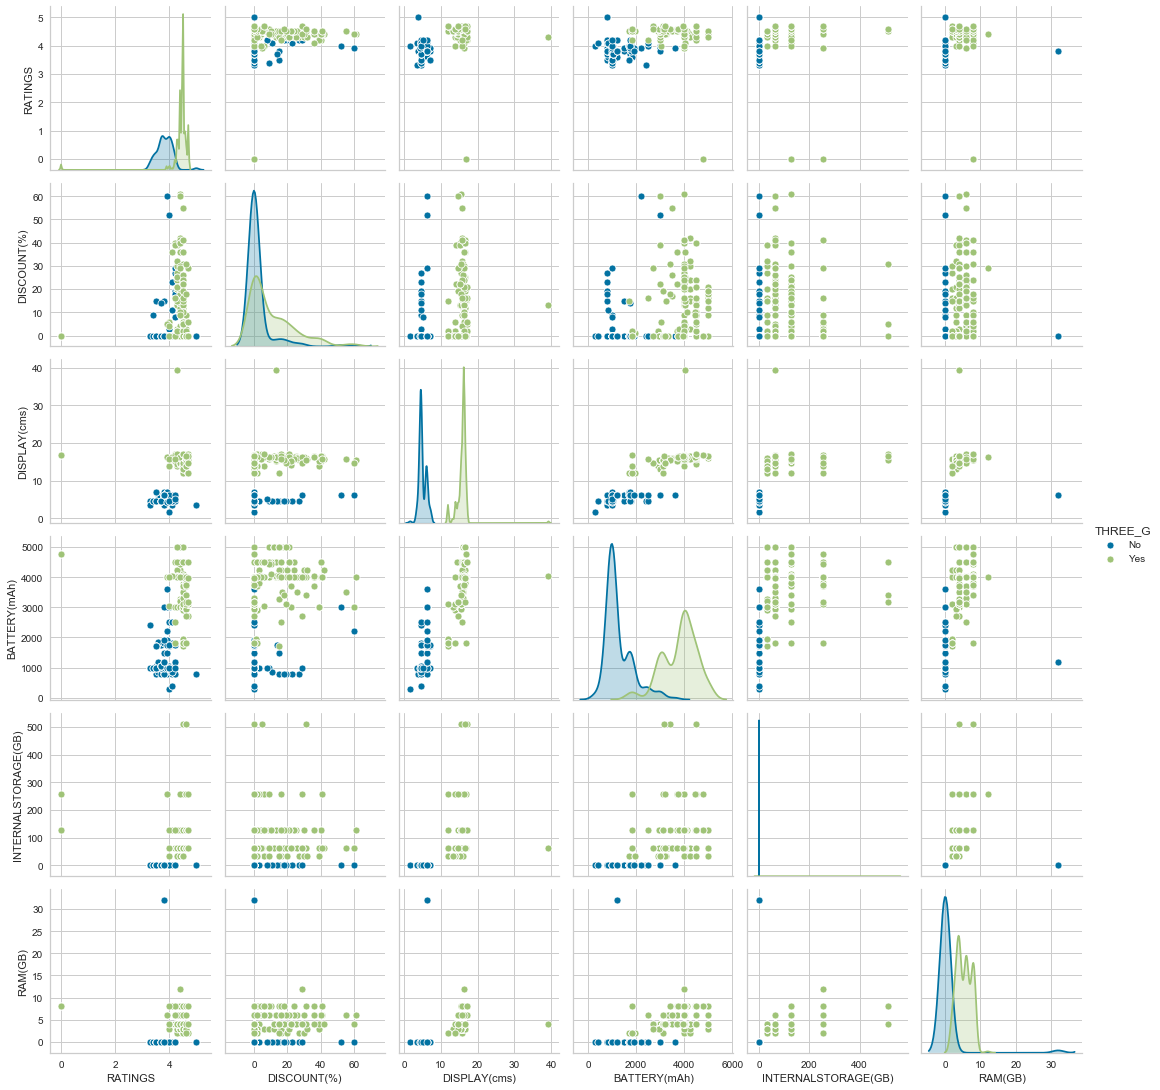

In [22]:
sns.pairplot( df,hue='THREE_G')

This plot shows pairwise relationships in the data.

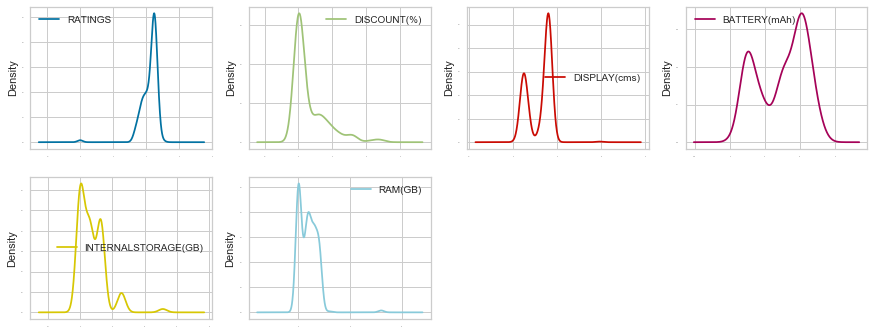

In [23]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

As we can see above all the plot excluding discount follows almost normal distribution, but we cant apply log transform or any type of transformation, because these are real life data and cant be modified.

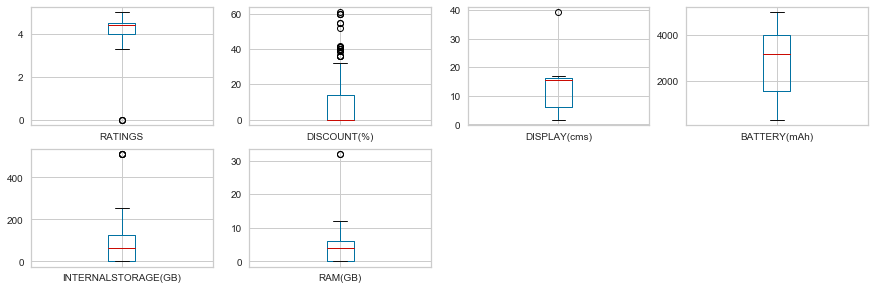

In [24]:
## box and whisker plots(To check shape of variables and outliers in variables)
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (15, 10))
plt.show()

As we can see above, the boxplot gives the distribution of data, and we can see there are high no. of outliers in the discount feature, because some of the mobile phones have not got any discount on their price.

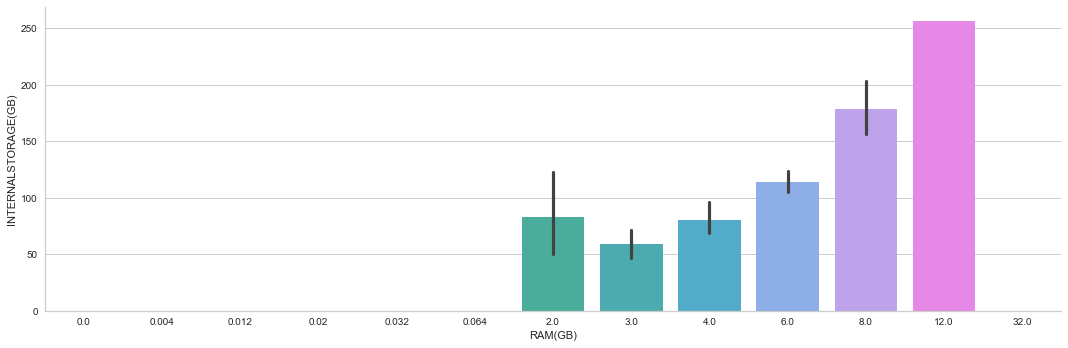

In [25]:
sns.catplot(x="RAM(GB)", y="INTERNALSTORAGE(GB)",  kind="bar", data=df,orient="v",height=5, aspect=3)

Here we can see the relationship between INTERNALSTORAGE(GB) AND RAM(GB) using the barplot.

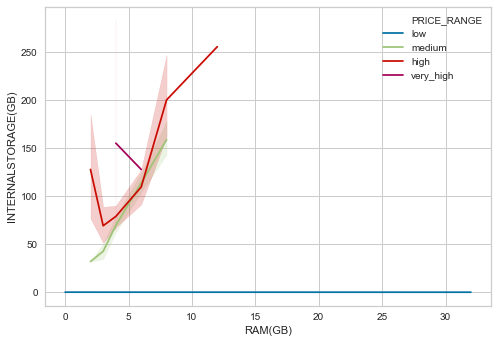

In [26]:
sns.lineplot(x=df['RAM(GB)'],y=df['INTERNALSTORAGE(GB)'],hue=df['PRICE_RANGE'])

Following plot shows internal storage and ram according to the price range.

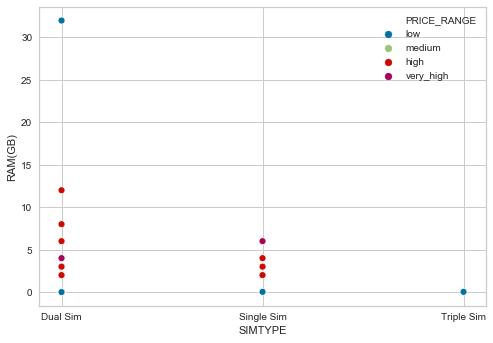

In [27]:
sns.scatterplot(x=df['SIMTYPE'], y=df['RAM(GB)'],hue=df['PRICE_RANGE'])

The following scatter plot shows the simtype and ram accordng to the price range.

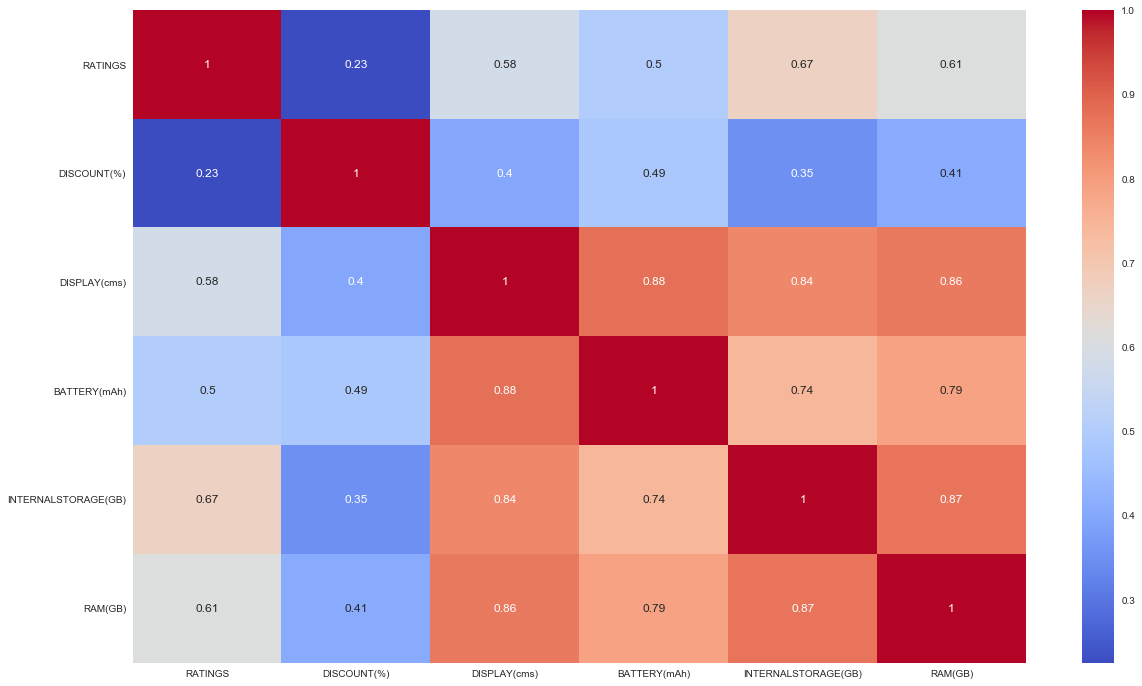

In [28]:
# Figure size
cor=df.corr(method='spearman')
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

This heatmap shows the relationship using the differnt variations in colour.

### DATA PREPROCESSING

In [29]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['PRICE_RANGE']= label_encoder.fit_transform(df['PRICE_RANGE']) 
  
df['PRICE_RANGE'].unique() 

array([1, 2, 0, 3])

In [30]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['THREE_G']= label_encoder.fit_transform(df['THREE_G']) 
  
df['THREE_G'].unique() 

array([0, 1])

In [31]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['SIMTYPE']=label_encoder.fit_transform(df['SIMTYPE'])
  
df['SIMTYPE'].unique()

array([0, 1, 2])

In [32]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['BLUETOOTH']= label_encoder.fit_transform(df['BLUETOOTH']) 
  
df['BLUETOOTH'].unique() 

array([0])

In [33]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['WIFI']= label_encoder.fit_transform(df['WIFI']) 
  
df['WIFI'].unique() 

array([1, 0])

In [34]:
df

,RATINGS,DISCOUNT(%),DISPLAY(cms),BATTERY(mAh),INTERNALSTORAGE(GB),RAM(GB),PRICE_RANGE,SIMTYPE,THREE_G,BLUETOOTH,WIFI
0,3.8,15.0,4.57,1500,0.064,0.032,1,0,0,0,1
1,3.5,15.0,4.57,800,0.032,0.032,1,0,0,0,0
2,3.6,0.0,4.57,850,0.032,0.032,1,0,0,0,0
3,3.6,0.0,4.57,1050,0.064,0.032,1,0,0,0,1
4,3.4,0.0,4.57,1000,0.064,0.032,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
377,4.7,0.0,16.51,3969,64.000,4.000,3,0,1,0,1
378,4.7,0.0,16.51,3969,64.000,4.000,3,0,1,0,1
379,4.6,0.0,16.51,3174,512.000,4.000,3,0,1,0,1
380,4.7,0.0,14.73,3190,256.000,4.000,3,0,1,0,1


#### ASSIGNING TARGET(RESPONSE) VARIABLES AND THE PREDICTOR(INDEPENDENT) VARIABLES.

In [37]:
y= df["PRICE_RANGE"]
X=df.drop(["PRICE_RANGE"],axis=1)

#### PERFORMING TRAIN TEST SPLIT

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (267, 10)
X_test Shape :  (115, 10)
y_train Shape :  (267,)
y_test Shape :  (115,)


#### SCALING THE FEATURES

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### BUILDING DIFFERENT MODELS

#### 1] SVM

In [40]:
from sklearn.svm import SVC
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",probability=True,kernel="linear",random_state=1)

In [41]:
svm_model.fit(X_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
print("train_accuracy:",svm_model.score(X_train,y_train))
print("test_accuracy: ", svm_model.score(X_test,y_test))

train_accuracy: 0.8838951310861424
test_accuracy:  0.9130434782608695


C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


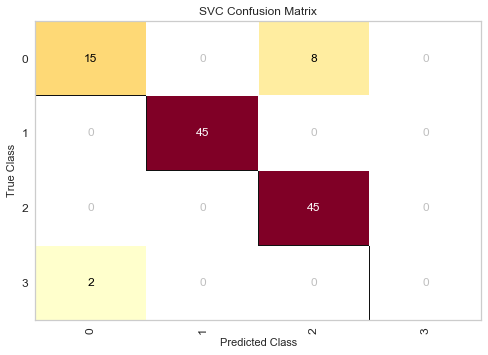

In [43]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()

In [44]:
y_pred=svm_model.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       0, 0, 2, 1, 2])

C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


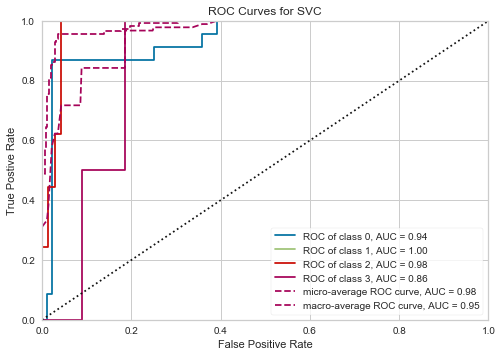

In [45]:

from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
visualizer = ROCAUC(svm_model, classes=[0,1,2,3])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [46]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
svm_r2=svm_model.score(X_test,y_test)
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred)
print("ACCURACY:",svm_r2)
print("Sensitivity: \t", (sensitivity_lr, 2))
print("Specificity: \t", (specificity_lr, 2))


Using TensorFlow backend.


ACCURACY: 0.9130434782608695
Sensitivity: 	 (array([0.65217391, 1.        , 1.        , 0.        ]), 2)
Specificity: 	 (array([0.97826087, 1.        , 0.88571429, 1.        ]), 2)


#### 2]LOGISTIC REGRESSION

In [52]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
ypred = ovr.predict(X_test)

In [53]:
print("train_accuracy:",ovr.score(X_train,y_train))
print("test_accuracy: ",ovr.score(X_test,y_test))

train_accuracy: 0.8277153558052435
test_accuracy:  0.8956521739130435


C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


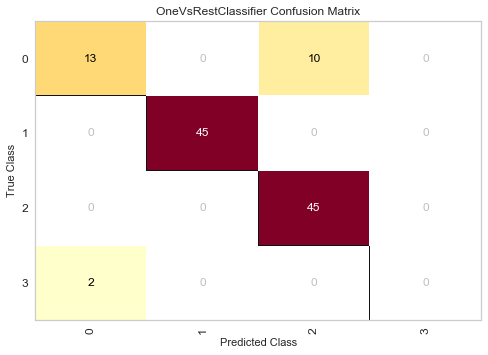

In [54]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    ovr, classes=[0,1,2,3]
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()

In [55]:
y_pred=ovr.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       0, 0, 2, 1, 2])

C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


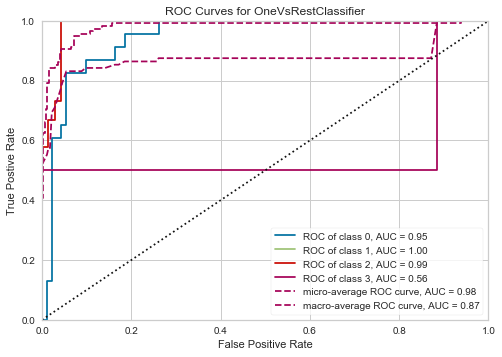

In [56]:

from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
visualizer = ROCAUC(ovr, classes=[0,1,2,3])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [57]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
log_r2=ovr.score(X_test,y_test)
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred)
print("ACCURACY:",log_r2)
print("Sensitivity: \t", (sensitivity_lr, 2))
print("Specificity: \t", (specificity_lr, 2))

ACCURACY: 0.8956521739130435
Sensitivity: 	 (array([0.56521739, 1.        , 1.        , 0.        ]), 2)
Specificity: 	 (array([0.97826087, 1.        , 0.85714286, 1.        ]), 2)


#### 3] DECISION TREE CLASSIFIER

In [58]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

# define model
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train,y_train)

ypred = dtree_model.predict(X_test)

In [59]:
print("train_accuracy:",dtree_model.score(X_train,y_train))
print("test_accuracy: ",dtree_model.score(X_test,y_test))

train_accuracy: 0.8576779026217228
test_accuracy:  0.8869565217391304


C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


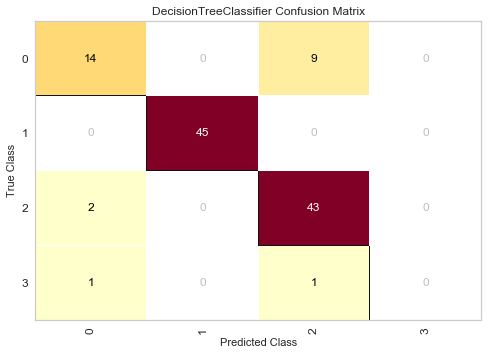

In [60]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    dtree_model, classes=[0,1,2,3]
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()

In [61]:
y_pred=dtree_model.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0,
       0, 2, 2, 1, 2])

C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


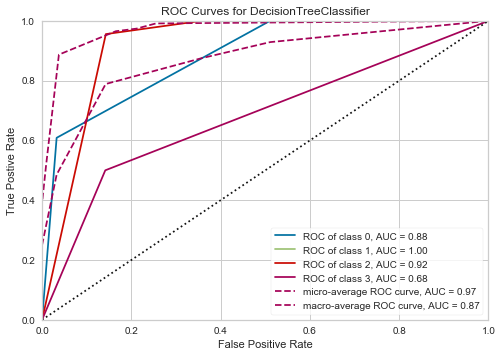

In [62]:
from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
visualizer = ROCAUC(dtree_model, classes=[0,1,2,3])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [63]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
dtr_r2=dtree_model.score(X_test,y_test)
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred)
print("ACCURACY:",dtr_r2)
print("Sensitivity: \t", (sensitivity_lr, 2))
print("Specificity: \t", (specificity_lr, 2))

ACCURACY: 0.8869565217391304
Sensitivity: 	 (array([0.60869565, 1.        , 0.95555556, 0.        ]), 2)
Specificity: 	 (array([0.9673913 , 1.        , 0.85714286, 1.        ]), 2)


#### KNN CLASSIFIER

In [64]:
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

ypred = knn.predict(X_test)

In [66]:
print("train_accuracy:",knn.score(X_train,y_train))
print("test_accuracy: ",knn.score(X_test,y_test))

train_accuracy: 0.8651685393258427
test_accuracy:  0.9304347826086956


C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


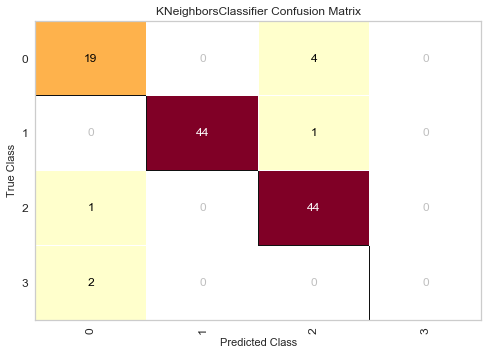

In [67]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    knn, classes=[0,1,2,3]
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()

In [68]:
y_pred=knn.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       0, 0, 2, 1, 2])

C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


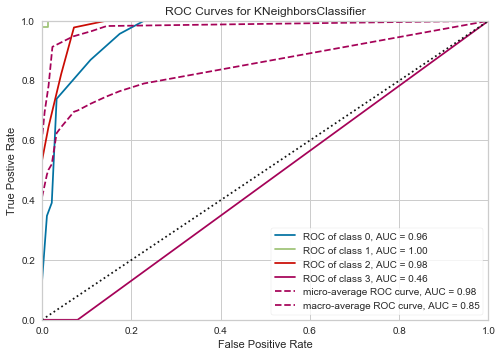

In [69]:
from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
visualizer = ROCAUC(knn, classes=[0,1,2,3])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

In [70]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
knn_r2=knn.score(X_test,y_test)
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred)
print("ACCURACY:",knn_r2)
print("Sensitivity: \t", (sensitivity_lr, 2))
print("Specificity: \t", (specificity_lr, 2))

ACCURACY: 0.9304347826086956
Sensitivity: 	 (array([0.82608696, 0.97777778, 0.97777778, 0.        ]), 2)
Specificity: 	 (array([0.9673913 , 1.        , 0.92857143, 1.        ]), 2)


#### CHECKING THE RESULTS

In [72]:
results = pd.DataFrame({ 'Model' : ['SUUPORT VECTOR CLASSIFICATION','LOGISTIC REGRESSION','DECISION TREE','KNN'],
                        'R2' : [svm_r2,log_r2,dtr_r2,knn_r2]})
results

,Model,R2
0,SUUPORT VECTOR CLASSIFICATION,0.913043
1,LOGISTIC REGRESSION,0.895652
2,DECISION TREE,0.886957
3,KNN,0.930435


### CROSS-VALIDATION

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {'n_neighbors': [3,5,11,19], 'weights': ['uniform','distance'],'metric':['euclidean','manhattan']}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3,n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

print("best score: ", grid_search_cv.best_score_)
print("best param: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


best score:  0.9400749063670412
best param:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.9s finished


#### BUILDING THE MODEL USING THE CV RESULTS

In [81]:
knn_final=KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [82]:
knn_final.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [83]:
print("train_accuracy:",knn_final.score(X_train,y_train))
print("test_accuracy: ",knn_final.score(X_test,y_test))

train_accuracy: 1.0
test_accuracy:  0.9217391304347826


C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


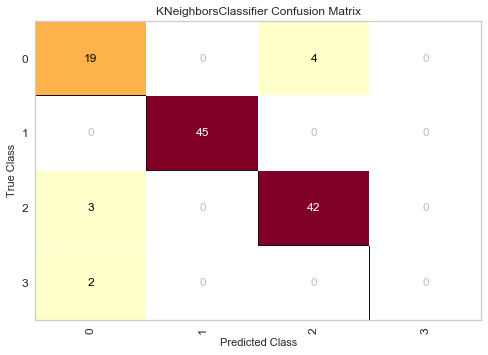

In [84]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    knn_final, classes=[0,1,2,3]
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()

In [85]:
y_pred=knn_final.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0,
       0, 0, 2, 1, 2])

C:\Users\krina\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


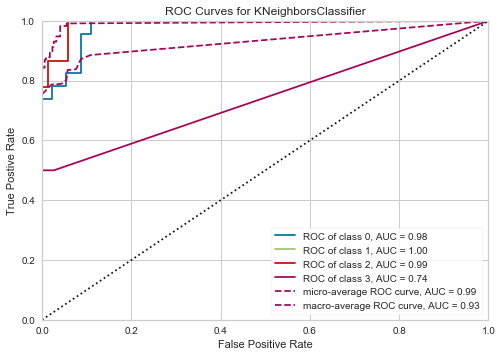

In [86]:
from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
visualizer = ROCAUC(knn_final, classes=[0,1,2,3])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [87]:
# check sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
cv_model_final_r2=knn_final.score(X_test,y_test)
sensitivity_lr, specificity_lr, _ = sensitivity_specificity_support(y_test, y_pred)
print("ACCURACY:",cv_model_final_r2)
print("Sensitivity: \t", (sensitivity_lr, 2))
print("Specificity: \t", (specificity_lr, 2))

ACCURACY: 0.9217391304347826
Sensitivity: 	 (array([0.82608696, 1.        , 0.93333333, 0.        ]), 2)
Specificity: 	 (array([0.94565217, 1.        , 0.94285714, 1.        ]), 2)


In [91]:
results = pd.DataFrame({ 'Model' : ['SUUPORT VECTOR CLASSIFICATION','LOGISTIC REGRESSION','DECISION TREE','KNN','KNN WITH CROSS VALIDATION'],
                        'R2' : [svm_r2,log_r2,dtr_r2,knn_r2,cv_model_final_r2]})
results

,Model,R2
0,SUUPORT VECTOR CLASSIFICATION,0.913043
1,LOGISTIC REGRESSION,0.895652
2,DECISION TREE,0.886957
3,KNN,0.930435
4,KNN WITH CROSS VALIDATION,0.921739


## CONCLUSION

In [89]:
from IPython.display import display, HTML
display(HTML(results.to_html(index=False)))

Model,R2
SUUPORT VECTOR CLASSIFICATION,0.913043
LOGISTIC REGRESSION,0.895652
DECISION TREE,0.886957
KNN,0.930435
KNN WITH CROSS VALIDATION,0.921739


### So, looking at the conclusion we can see that KNN gives you the best results and after doing hyperparameter tuning for KNN , we get the accuracy as 92.17% which gives you the best result for multi-class classification.